In [1]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 19 - 20')

In [3]:
import pandas as pd
dataset = pd.read_csv('airline_passengers.csv')

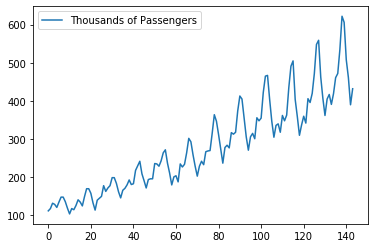

In [6]:
dataset.plot()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [16]:
dataset.set_index('Month', inplace=True)

In [17]:
dataset

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


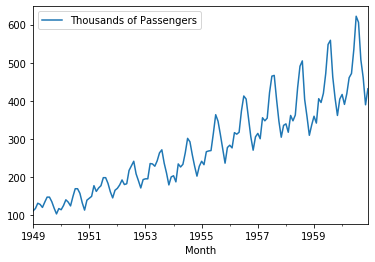

In [18]:
dataset.plot()

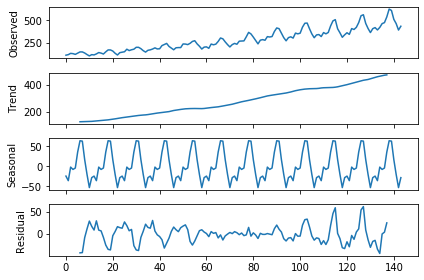

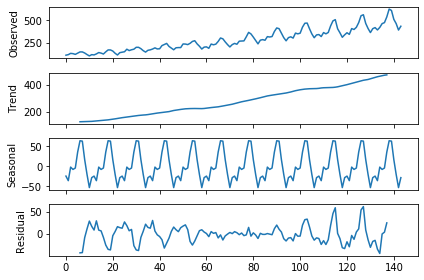

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositon = seasonal_decompose(dataset['Thousands of Passengers'], freq=12)
decompositon.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [22]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'p-Value', '#Lags', 'No of Obs']
    for value, labels in zip(result, labels):
        print(labels + ':' + str(value))
    if result[1]<=0.05:
        print('Time series is stationary')
    else:
        print('Time Series is not stationary')

In [23]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic:0.8153688792060423
p-Value:0.9918802434376409
#Lags:13
No of Obs:130
Time Series is not stationary


In [24]:
dataset['Thousands of Passengers 1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [28]:
adf_check(dataset['Thousands of Passengers 1st Diff'].dropna())
#d=1

Augmented Dickey Fuller Test
ADF Test Statistic:-2.8292668241699874
p-Value:0.05421329028382711
#Lags:12
No of Obs:130
Time Series is not stationary


In [29]:
dataset['Thousands of Passengers 2nd Diff'] = dataset['Thousands of Passengers 1st Diff'] - dataset['Thousands of Passengers 1st Diff'].shift(1)

In [30]:
dataset

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [32]:
adf_check(dataset['Thousands of Passengers 2nd Diff'].dropna())
#d=2

Augmented Dickey Fuller Test
ADF Test Statistic:-16.384231542468513
p-Value:2.7328918500142026e-29
#Lags:11
No of Obs:130
Time series is stationary


In [33]:
dataset['Seasonal Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(12)

In [35]:
dataset.to_csv('seasonaldiff.csv')

In [37]:
adf_check(dataset['Seasonal Diff'].dropna())
#D=1

Augmented Dickey Fuller Test
ADF Test Statistic:-3.3830207264924805
p-Value:0.011551493085514982
#Lags:1
No of Obs:130
Time series is stationary


In [ ]:
dataset['Seasonal Diff']-dataset['Seasonal Diff'].shift(12)

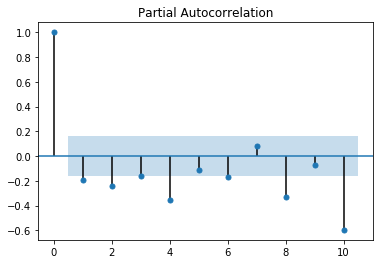

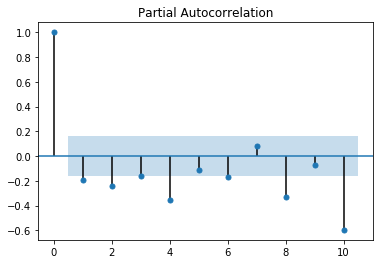

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(dataset['Thousands of Passengers 2nd Diff'].dropna(),lags=10)
#p=0

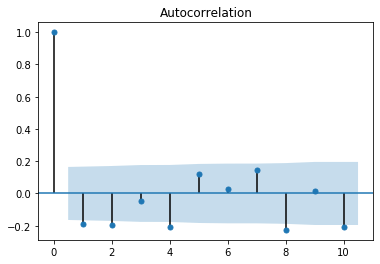

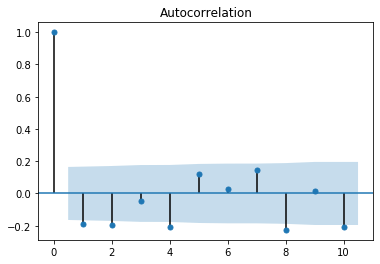

In [42]:
plot_acf(dataset['Thousands of Passengers 2nd Diff'].dropna(), lags=10)
#q=0

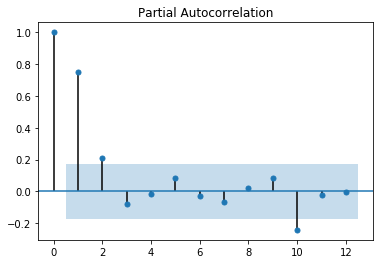

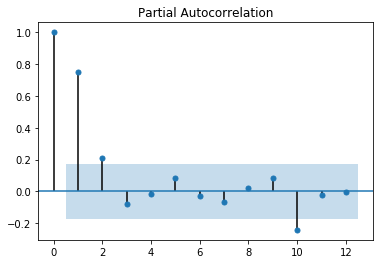

In [44]:
plot_pacf(dataset['Seasonal Diff'].dropna(),lags=12)
#P=1

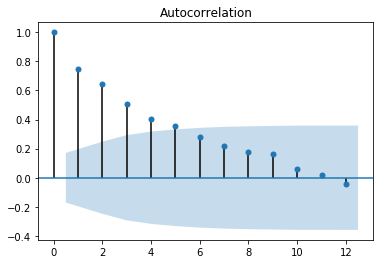

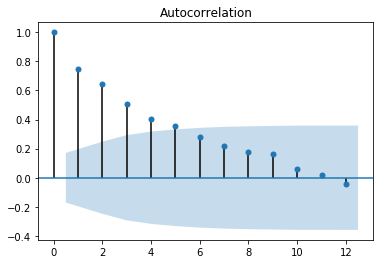

In [46]:
plot_acf(dataset['Seasonal Diff'].dropna(), lags=12)
#Q=2

In [47]:
#d = 2, D = 1, p = 0, P = 1 , q = 0, Q = 2

In [48]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [53]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order=(1,2,1), 
                                  seasonal_order=(1,2,1,12))
results = model.fit()
print(results.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -467.460
Date:                            Sat, 08 Aug 2020   AIC                            944.920
Time:                                    09:16:10   BIC                            958.774
Sample:                                01-01-1949   HQIC                           950.545
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4157      0.081     -5.106      0.000      -0.575      -0.256
ma.L1         -0.9999     20.269   

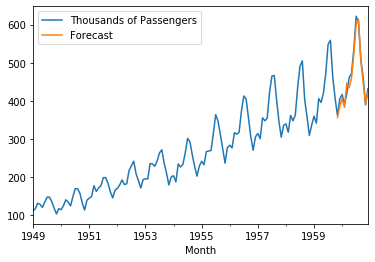

In [56]:
dataset['Forecast'] = results.predict(start=130, end=144, dynamic=True)
dataset[['Thousands of Passengers', 'Forecast']].plot()

In [51]:
len(dataset)

144

In [58]:
from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [59]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [60]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns=dataset.columns)

In [61]:
future_dates_df

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seasonal Diff,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [62]:
future_df = pd.concat([dataset, future_dates_df])

In [63]:
future_df

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seasonal Diff,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


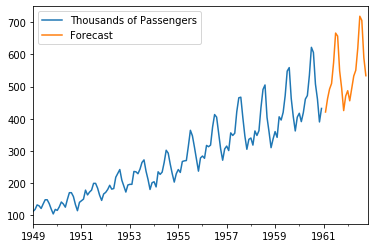

In [66]:
future_df['Forecast'] = results.predict(start =  145, end=165 , dynamic =True)
future_df[['Thousands of Passengers', 'Forecast']].plot()

In [67]:
future_df

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seasonal Diff,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,718.697299
1962-08-01,NaN,NaN,NaN,NaN,705.730465
1962-09-01,NaN,NaN,NaN,NaN,589.586466
1962-10-01,NaN,NaN,NaN,NaN,533.775567
